In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [51]:
df = pd.read_csv('database/data.csv', index_col=0)
print(df.shape)
df.head()

(215, 14)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## a. Exploratory Data Analysis (EDA)
1. Checking for Missing Data and Correlation
2. Girls v/s Boys
3. Which board in 10th would help me to get a better job?
4. Which board in 12th would help me to get a better job?
5. Does my performance in School and College even relate?
6. Does Interships/Work Experience even matter?
7. Which streams are better (job perspective)?
8. The most awaited question, how much college academic performance matter?

## b. Pre-processing
1. Type of Feature
2. Distribution of Numerical Features
3. One-hot encoding

## c. Feature Selection
## d. Predictive Analysis + Model Evaluation


# **Exploratory Data Analysis (EDA)**

### 1. Checking for Missing Data and Correlation

#### Missing Data

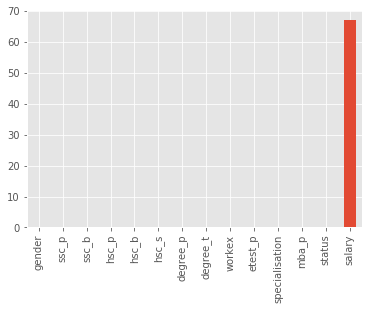

In [52]:
df.isnull().sum().plot.bar()

We can see only "salary" has NaN values (67). Roughly, 30% of columns have missing features. So, we cannot just remove them completely. Let's see if there's any pattern!

In [53]:
df[df.salary.isnull()==True].status.value_counts()

Not Placed    67
Name: status, dtype: int64

Isn't that just obvious? Those who were not placed do not earn anything, i.e, they don't get any salary. Thus, their salary data is missing.

We can also say that their salary is 0! Thus, replacing NaN values with 0....

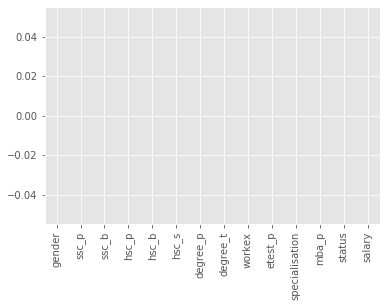

In [54]:
df.salary.fillna(0, inplace=True)
df.isnull().sum().plot.bar()

### Correlation

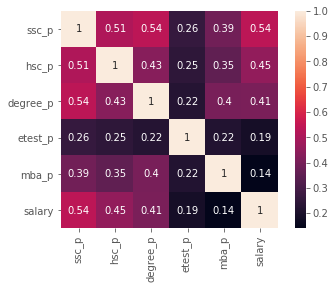

In [55]:
sns.heatmap(df.corr(), annot=True, square=True)

This graph shows the correlation between the Numerical Features! The higher the value, the more they're correlated.

### Creating a Plotting Template
It'll make things easier and clean. You'll see...

In [56]:
def plot(data, x, y):
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=y, y=x)
    plt.subplot(1, 2, 2)
    sns.violinplot(x=x, y=y, data=data)    
    
#     plt.figure()
    count_percentage = df.groupby(x)['status'].value_counts() / df.groupby(x)['status'].count() *100
    count_percentage.unstack().plot(kind='bar', stacked=False, figsize=(9, 5))
    plt.ylabel('Count Percentage')    
    plt.xticks(rotation=0)
    plt.legend(loc=2)    
    


## 2. Girls v/s Boys
First, let's see who is getting more placements and higher package.

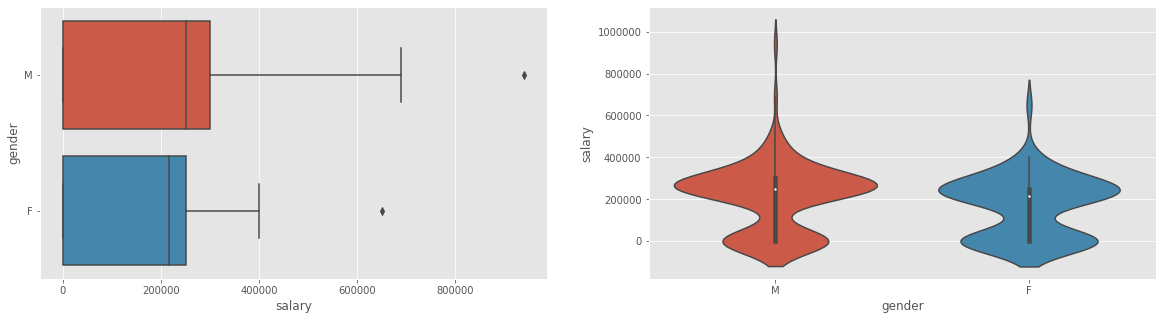

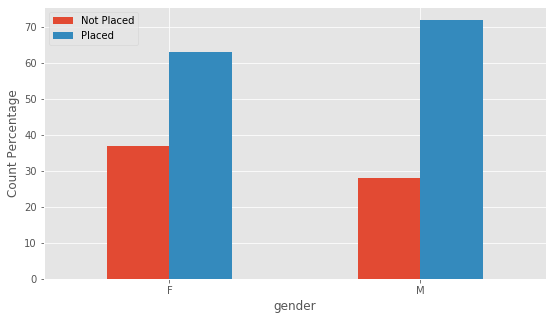

In [57]:
plot(df, x='gender', y='salary')

Observations:
* From the 2nd plot, it can be clearly seen '**Being Placed Ratio**' (Ratio of being placed to not being placed)' in 'Males' is 70-30 (roughly) and in 'Females' it drops down to 60-40
* Thus, it is safe to say that a 'Male' has a better chances of being placed over a 'Female'!
* But that does not mean that Females aren't not as good as Males. We still don't have any concrete proof to support this statement. The above stat could've been affected by various other reasons also. Probably because Males are more flexible to the job requirements, like location, shifts and what not.
* We can clearly see that the Median of Salary is also higher in Males. 
* And the highest package if Males went upto 10L (roughly), whereas in Females it only went upto 6.5L
* And the most amazing thing that we can observe it that more number of Males got a higher package than the crowd (above 75 percentile), whereas very few girls were able to achieve that.

## 3. Which board in 10th would help me to get a better job?

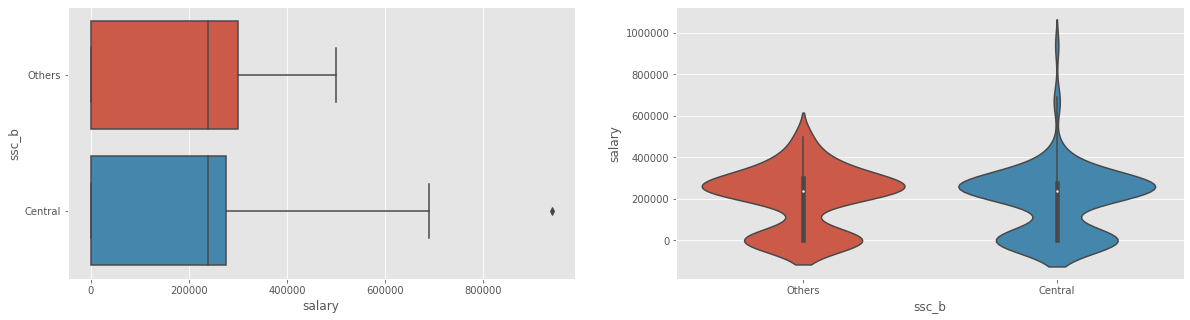

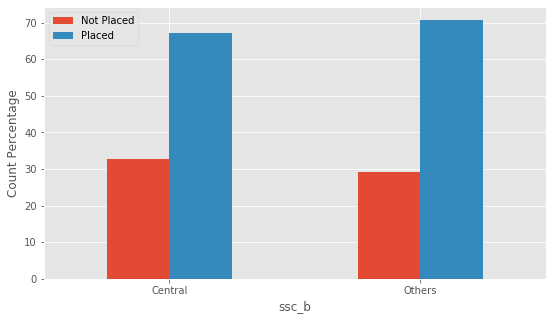

In [58]:
plot(df, x='ssc_b', y='salary')

Observations:

* The Being Placed Ratio is roughly the same in both the categories. 70-30 (somewhat more favourable in 'Others' board though!)
* The fun part begins when we analyze the salary! We can see that the median salary of students from both board is somewhat the same. But does that mean one board isn't more better than another? It's too early to conclude that yet.
* We can see that many more students from 'Central' board got a higher package! The 75-100 percentile range shows that. It even crosses the Max package in 'Others' board.
* Still, the craziest part is, that the highest package is 10L in 'Central' board (must be that same boy we analyzed a little while ago), whereas, it's just 5L in 'Other' boards. This is insane! Just double the package!

<!-- 
* The Being Placed Ratio is roughly the same in both the categories. 70-30 (somewhat more favourable in 'Others' board though!)
* The fun part begins when we analyze the salary! We can see that the median salary of students not from 'Central' board is slightly higher than those from 'Central' board. But does that mean 'Central' board isn't good? It's too early to conclude that yet.
* We can see that many more students from 'Central' board got a higher package! (The 75-100 percentile range shows that)
* Still, the craziest part is, that the highest package is 10L in 'Central' board (must be that same boy we analyzed a little while ago), whereas, it's just 5L in 'Other' boards. This is insane! Just double the package!
* If we notice, we can also see that the 'Female' with the highest package also is from 'Central' board (there is only 1 person who got 6.5L!) -->

## 4. Which board in 12th would help me to get a better job?

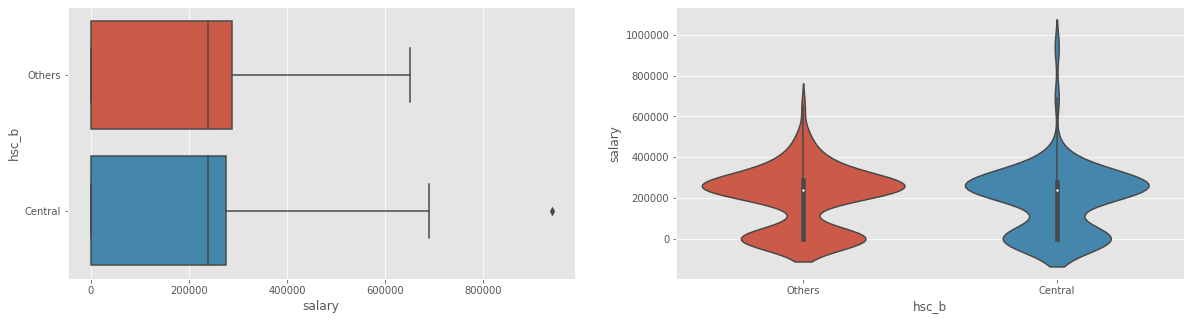

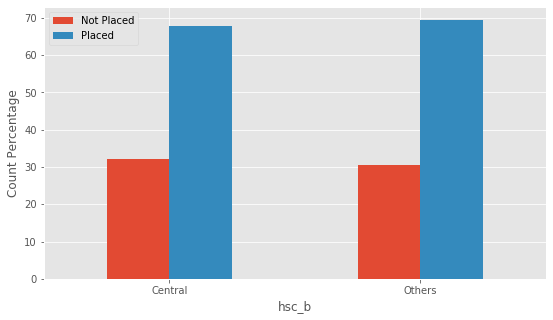

In [59]:
plot(df, x='hsc_b', y='salary')

Observations:

* Wow, 95% of the stats is exactly same as above. Thus, we can conclude the same things from this feature too.
* EXCEPT, this time, the max package in 'Others' Board is around 6.5L, that clearly shows a few students did switch over to 'Other' boards after 10th.

## 5. Does my performance in School and College even relate?

In [60]:
# Correlation between 10th marks and 12th marks.

df[['ssc_p', 'hsc_p', 'degree_p']].corr()

,ssc_p,hsc_p,degree_p
ssc_p,1.000000,0.511472,0.538404
hsc_p,0.511472,1.000000,0.434206
degree_p,0.538404,0.434206,1.000000


As we can see, the correlations basically came out to be 0.50 give or take.

Now, this is semi-positive correlation. FYI, correlation ranges from -1 to 1, **-1** being the *Negetive Correlation* and **+1** is the *Positive correlation*. 

0.50 says that the marks are 'semi' positively correlated. That means, the student who got good marks in 10th is likely to score good in other levels too.

In [61]:
def normalize(x, scale, bias):
    return (x-x.min()) / (x.max()-x.min())*scale + bias

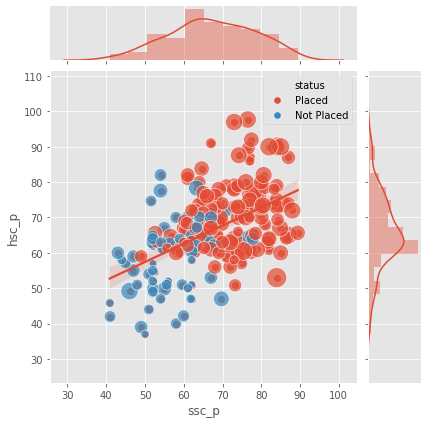

In [62]:
sns.jointplot(data=df, x='ssc_p', y='hsc_p', kind='reg')
sns.scatterplot(data=df, x='ssc_p', y='hsc_p', hue='status', s=normalize(df['degree_p'], 350, 50), alpha=0.7)

Now, we can observe a lot of amazing things by this plot:

1. The very first thing we see it that this is a SCATTER PLOT plotted against a student's 10th and 12th marks.
   * Most of the students who scored good in 10th (ssc_p), also scored good in 12th (hsc_p).
   * Though we can still see some amazing comebacks, there are students who did not perform good in 10th, but nailed it (respectively) in 12th. For eg. Observe the datapoint in the graph roughly at (55, 85). Those few students could not perform good in 10th but killed it in 12th.
   * Then there are students like myself also, who nailed it in 10th but got lost somewhere in 12th ...*hahaha..haha..h...*:|
  
  
2. Second thing --> Placed Status:
   * There is basically only one thing to notice here, that most of the 'Non-placed' students scored less than 60-65 range in School.
   * But wait before you judge anyone, this does not mean that those students are not Job materials, this could be the reason of the 'STUPID' cut-off. Maybe, the companies filtered out those students before even giving them a chance to interiew. *This will get more clear in the upcoming analysis.*


3. What's about College's score?
   * The College's score is shown by the size of the marker. The bigger the data-point, the higher the score.
   * Again we can see the larger dots are mostly at the upper right section of the graph. Those are the students who performed good at all levels and are placed more often.
   
**But what about the quality of job? What about the salary? Does those ivy league students got the best placements too?**

*And that's what we're gonna analyze next. Hold your breath!*

## 6. Does Interships/Work Experience even matter?

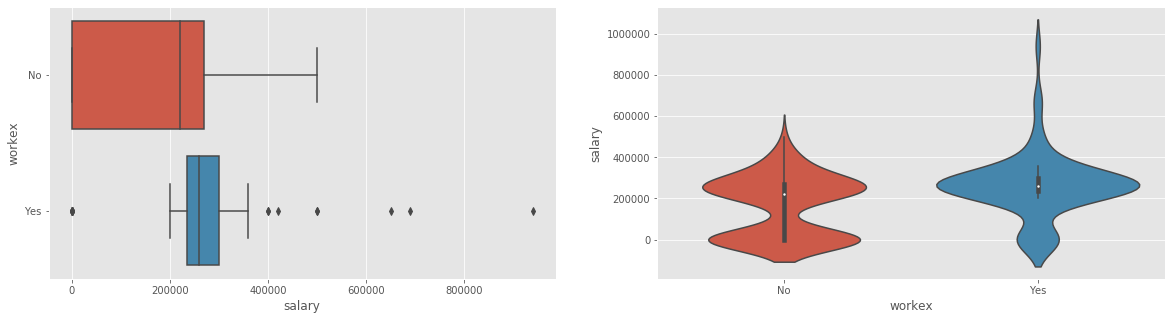

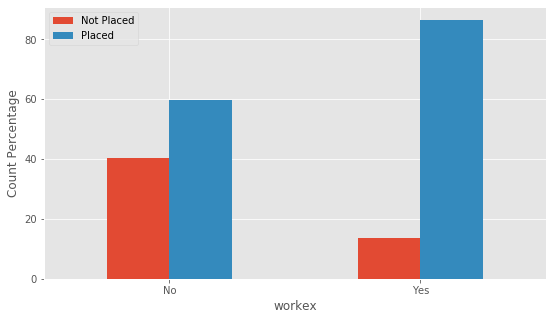

In [63]:
plot(df, x='workex', y='salary')

Observations:
  * Hell yeah Work Experience matter! This could be anything. Working as an intern, part-time, freelancing etc etc, all is counted in Work Experience.
  * The BPR ratio:
     * Yes -> 85-15
     * No  -> 60-40


  * Isn't that just obvious? Students who have even a little Work Experience knows more about working in a team/organization bla bla. Anybody would prefer someone with experience over someone who has never officially worked before! And this stat is the proof!
  

In [64]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## 7. Which streams are better (job perspective)?

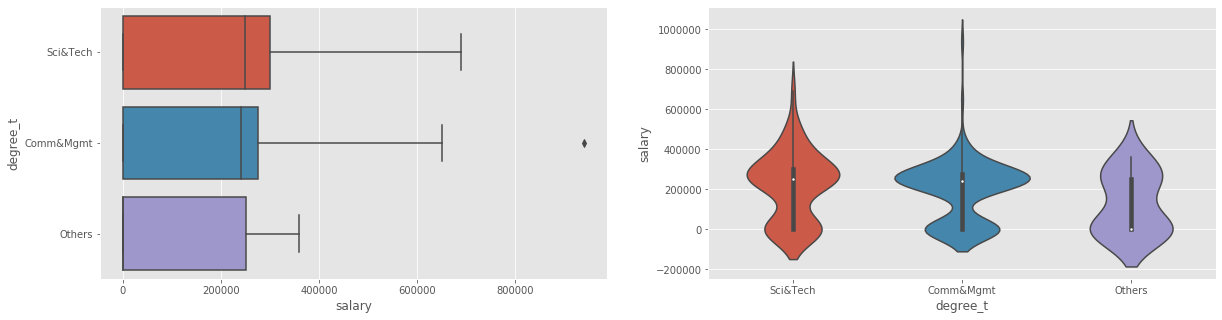

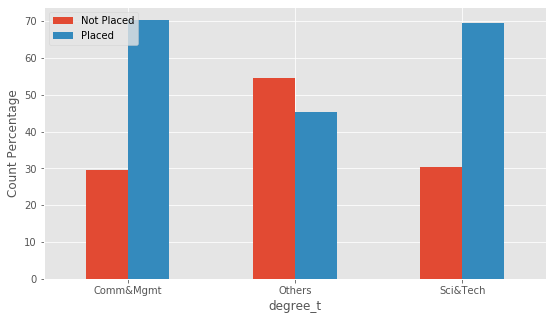

In [65]:
plot(df, x='degree_t', y='salary')

We can observe that:

* The BPR is:
    * Comm&Mgmt --> 70:30
    * Sci&Tech  --> 70-30
    * Others    --> 45-55

* Thus, we can say that Students not from Science or Commerce background are likely to not secure a job.

* Also, From the Box Plot, we can infer that Sci&Tech students salary is slightly better than that of Comm&Mgmt. BUT, the highest package (the 10L one) was given to a Comm&Mgmt student!

* The violen plot shows that there are a lot of students placed with a package of 2-3L in Comm&Mgmt, whereas the other domains are spreaded.

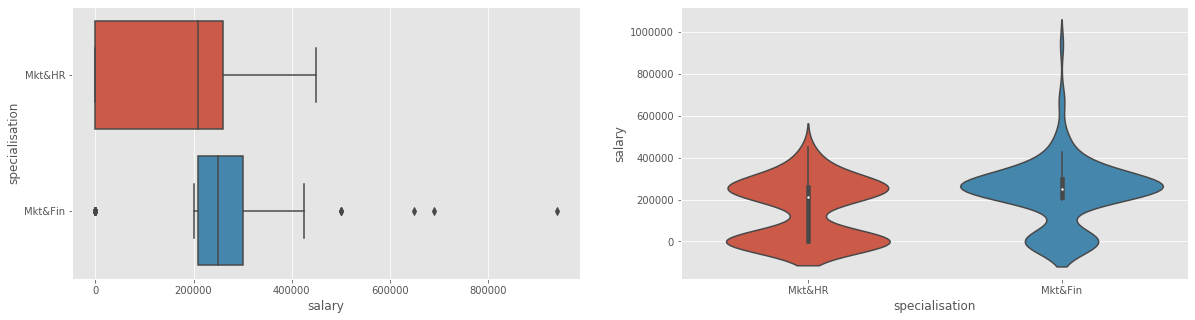

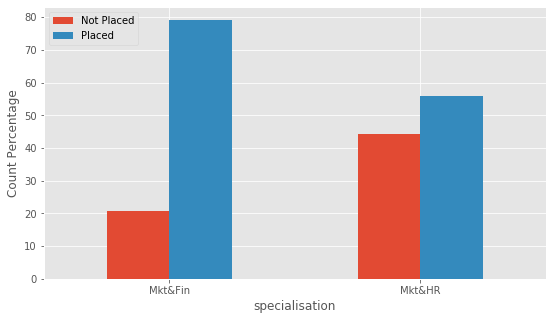

In [66]:
plot(df, x='specialisation', y='salary')

Now this is amazing:

* The BPR is:
    * Mkt&Fin --> 80-20
    * Mkt&HR  --> 55-45 
   

* Clearly, the students who did their specialization in Mkt&Fin are much likely to land a job.

* Infact, a very few students of Mkt&Fin didn't get a job (outlier in Box Plot!), and the base salary starts from 2L, which is higher than the MEDIAN of salary of Mkt&HR students!

* Also, quite a few students landed jobs with very high packages, and looks like all of them did their specialization in Mkt&Fin!

## 8. The most awaited question, how much college academic performance matter?

First, let's see the type of students based on their College's Academic performance.

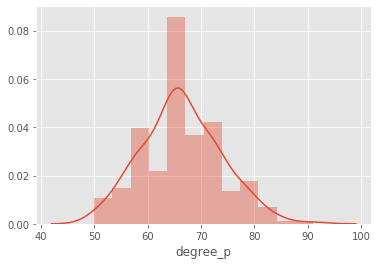

In [67]:
sns.distplot(df['degree_p'])

We can see, there are more number of average students (65-70%). And that obvious. This is the case almost everywhere. There are more number of average students than the toppers and those who couldn't focus properly.

Now, let's check the correlation..

In [68]:
df[['degree_p', 'salary']].corr()

,degree_p,salary
degree_p,1.000000,0.408371
salary,0.408371,1.000000


Woah! The correlation is coming out to be pretty good. Let's now check the visuals..

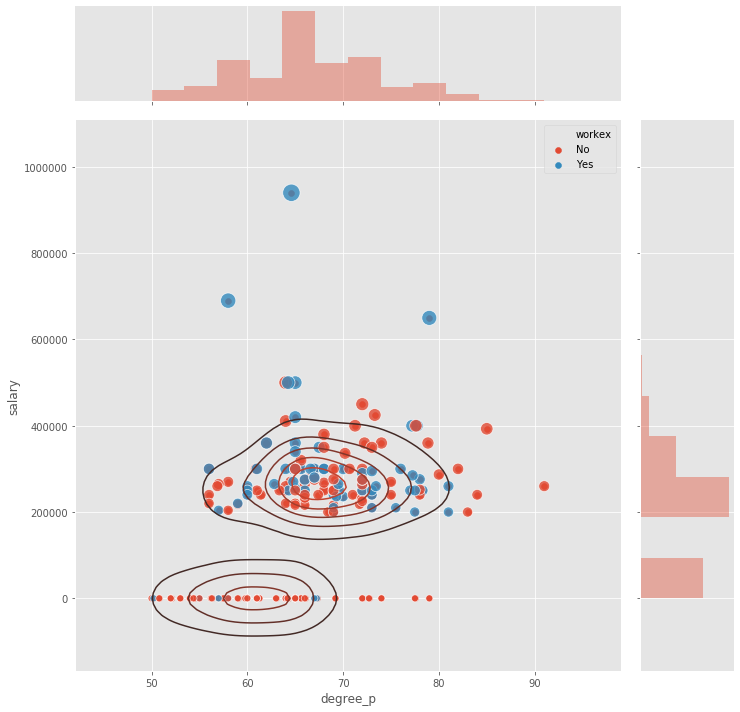

In [69]:
sns.jointplot(data=df, x='degree_p', y='salary', kind='scatter', height=10).plot_joint(sns.kdeplot, zorder=5, n_levels=6)
sns.scatterplot(data=df, x='degree_p', y='salary', hue='workex', s=normalize(df['salary'], 250, 50), alpha=0.8)

**BAM!!** There is a lot of things in this graph which will uncover the real truth!

1. **Which students got placed more?**
   * It can be clearly seen from the the KDE(Kernel Density Estimate) plot and the HISTOGRAM that, the students who scored average (around 65-70%) are placed more. But that' just plain obvious. Because, we just saw (in the histogram before) that there are more number of average students. Thus, if students are more, the density graph is bound to support that area.
   

2. **Did Work Experience helped the students to get a better and high-paying job?**
   * HELL YEAH! We can CLEARY see that all the comparitively good jobs (above 5LPA) were taken by those students who had prior Work Experience. It's not true that all of them got the best jobs, but, the best jobs were taken by them only. You see the relation? Can you visualize the venn diagram? Haha.
   
   
3. **Who got BETTER jobs? Toppers or Average?**
   * If you hadn't observed it yet, then let me tell you, it's the AVERAGE Students who got the BETTER/HIGHER PAYING jobs, not the TOPPERS!
   * Let's assume that in this case, a high paying job is the one who pays more that 5LPA. Now:
      1. There are a total of 6 students who got those jobs.
      2. Out of which, 5 students score less than 65%!!!!
      3. **And the one thing that made me jump**, the student who scored less than even 60%, got a far higher package than the one who scored above 90%!!! Isn't that just amazing!!??
      4. But one thing is to understand here, it's not the all the average students got better packages. One who'll work hard on his/her skills will surely get a better reward. Maybe now, maybe later. But it is CERTAIN! **And then it does not matter if he/she scored 2000% or failed miserably in college!**

# **PRE-PROCESSING**

## 1. Type of Feature

Now, we've to determine the type of feature before jumping into pre-processing. Basically, there are 2 types of features:
* Categorical Features
* Numerical Features

And we need to determine that before everything else because both the types have to be handled very differently. You'll see why..

In [70]:
cat_f = [f for f in df.columns if df[f].dtype == 'O' and f!='status']
num_f = [f for f in df.columns if f not in cat_f and f not in ['status', 'salary']]

print('Total Number of Categorical Features :', len(cat_f))
print('Total Number of Numerical Features   :', len(num_f), '\n')

print('Categorical Features are :', cat_f)
print('Numerical Features are   :', num_f)

Total Number of Categorical Features : 7
Total Number of Numerical Features   : 5 

Categorical Features are : ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
Numerical Features are   : ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']


## 2. Distribution of Numerical Features

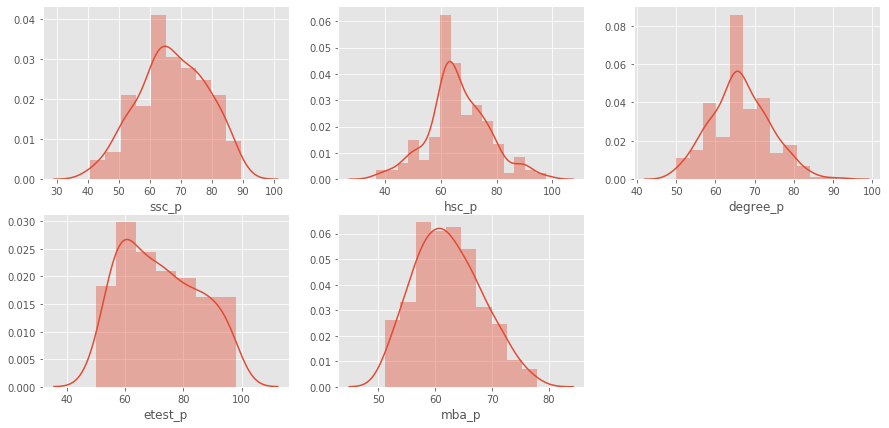

In [71]:
plt.figure(figsize=(15, 7))
for idx, f in enumerate(num_f):
    plt.subplot(2, 3, idx+1)
    sns.distplot(df[f])

We can see the Features are distributed well enough. But still, there's no harm in applying the standard LOG NORMALIZATION, it'll only make the distribution better anyways!

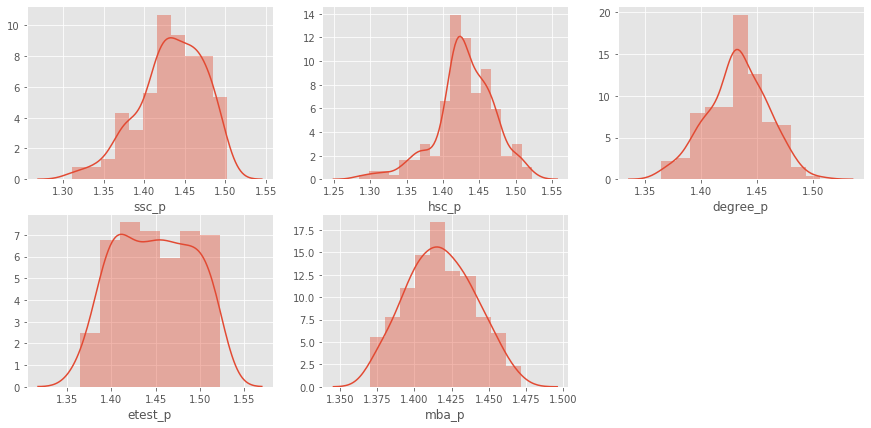

In [72]:
df[num_f] = df[num_f].apply(np.log)

plt.figure(figsize=(15, 7))
for idx, f in enumerate(num_f):
    plt.subplot(2, 3, idx+1)
    sns.distplot(np.log(df[f]))

## 3. One-hot encoding

Now, we know our model cannot accept any string value. Thus, we need to convert our Categorical Features into Numerical Features. One-hot encoding is one way to do it.

One-hot encoding splits the Classes into different features and mark them to be true/false using the binary digits. One advantage is that it gives the model more features to train on.

In [73]:
one_hot = pd.get_dummies(df[cat_f+['status']], drop_first=True)

df = pd.concat([df, one_hot], axis=1)
df = df.drop(cat_f+['status'], axis=1)
df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
sl_no,,,,,,,,,,,,,,,,
1,4.204693,4.510860,4.060443,4.007333,4.074142,270000.0,1,1,1,1,0,0,1,0,1,1
2,4.373616,4.360931,4.350020,4.460144,4.193888,200000.0,1,0,1,0,1,0,1,1,0,1
3,4.174387,4.219508,4.158883,4.317488,4.056989,250000.0,1,0,0,0,0,0,0,0,0,1
4,4.025352,3.951244,3.951244,4.189655,4.084799,0.0,1,0,0,0,1,0,1,0,1,0
5,4.452019,4.298645,4.294561,4.572647,4.016383,425000.0,1,0,0,1,0,0,0,0,0,1


# **Feature Selection**

There are two ways for feature selection:
   1. Manually Select
   2. Use the amazing Sklearn Library to automatically select the best features.
    
Here, I went with option number 2 just to show how it's done. You can try experimenting with the features based on their correlations and other analysis.

In [87]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# We'll exclude the 'salary' feature because that directly shows if the student got the job or not. Model will be of no use in that case. 
FEATURES  = df.drop(['status_Placed', 'salary'], axis=1)
LABEL     = df['status_Placed']

X_train, X_test, y_train, y_test = train_test_split(FEATURES, LABEL, test_size=0.2)

model = SelectFromModel(Lasso(alpha=0.005))
model.fit(X_train, y_train)

selected_features = X_train.columns[model.get_support()]

print('Total Features    :', len(X_train.columns))
print('Selected Features :', len(selected_features))
print('No. of Features whose coeffs shrank to 0 :', sum(model.estimator_.coef_ == 0))

print('\n Selected Features are :', list(selected_features))

Total Features    : 14
Selected Features : 10
No. of Features whose coeffs shrank to 0 : 4

 Selected Features are : ['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'gender_M', 'ssc_b_Others', 'hsc_b_Others', 'degree_t_Sci&Tech', 'workex_Yes', 'specialisation_Mkt&HR']


# **Predictive Analysis + Model Evaluation**

We'll now be predicting if the student got the job or not.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix


In [101]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, pred)

print(f'Accuracy of Logistic Regression Model : {round(accuracy, 2)*100}%')

Accuracy of Logistic Regression Model : 84.0%


/home/atom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, pred)

print(f'Accuracy of Random Forest Model : {round(accuracy, 2)*100}%')

Accuracy of Random Forest Model : 91.0%


# **Conclusion**

You can see how much can we learned about the data with just basic techniques and visualizations. Just imagine how much an Amazing Data Scientist can make sense of the tons and tons of Data in any company! Just imagine the power of Data Science!

Also, without doing any advanced Preprocessing and Predictive Analysis, we were able to achieve an accuracy of 91%...!

And I've barely scratched the surface of Data Science! **All of this is like the Flying Jatt in front of Thanos :p**